<center> <h1> Applying Logisic Regression, Decision Tree, SVM, Random Forest on Digits Dataset </h1> </center> 

***

### Import library

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt # For plotting
from sklearn.datasets import load_digits   # Load and return the digits datase
from sklearn.model_selection import train_test_split  # For splitting data into training and testing set
from sklearn.linear_model import LogisticRegression  # For logistic Regression
from sklearn.metrics import confusion_matrix   # For Confusion Matrix
import seaborn as sns   # For plotting 
from sklearn.metrics import classification_report # For printing the final report after training the model
import warnings   # To ignore the warnings 
warnings.filterwarnings('ignore')
import pandas as pd  # To use functions used in training a data
from sklearn import tree # To use decision tree algorithm
from sklearn.svm import SVC # To use support vector machine
from sklearn.ensemble import RandomForestClassifier # For using Random forest algorithm

### Import Digits data set

In [52]:
digits = load_digits()  # Saving in digits variable

In [53]:
dir(digits)   # Printing the name of the columns of digits

['DESCR', 'data', 'images', 'target', 'target_names']

In [54]:
digits.data[1]   # Printing the values 

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [55]:
print(digits.target[1])   # Printing the values of Target values
print(digits.target[16])

1
6


In [56]:
digits.target_names[9]  # Printing 10th value or 9th index value of the target_names column

9

<Figure size 432x288 with 0 Axes>

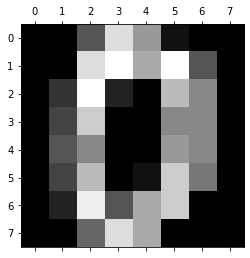

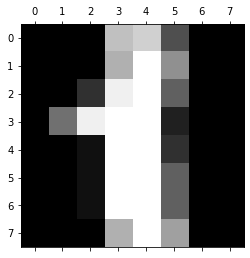

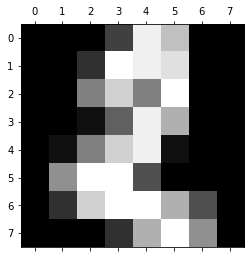

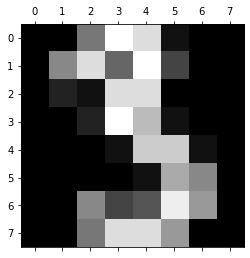

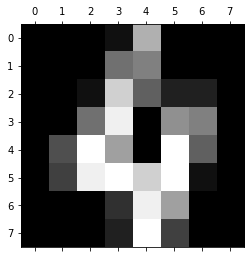

In [57]:
plt.gray()   # Gray map for dataset
#plt.matshow(digits.images[100])
for i in range(5):
    plt.matshow(digits.images[i])

***

### create Dataframe with daigits dataset

In [58]:
df = pd.DataFrame(digits.data)  # Converting dataset into data frame
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [59]:
df['target']= digits.target   # Setting the target value
df.head(11)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [60]:
X = df.drop('target',axis='columns') # Dropping the target column
y = df.target

In [61]:
# Splitting the values into trainig and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
X_train.shape  # Shape of trainig set

(1437, 64)

In [63]:
X_test.shape  # Shape of testing set

(360, 64)

***

<center> <h2>Logistic Regression</h2><center>

In [64]:
model = LogisticRegression()     # Training model with Logistic Regression
model.fit(X_train, y_train)           # Fit model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
model.predict(digits.data[155:169])     # Making prediction

array([5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8])

In [66]:
model.score(X_test, y_test)     # Check Accuracy of model

0.9694444444444444

#### Check what is image and value at position 355 and what our model is predicting

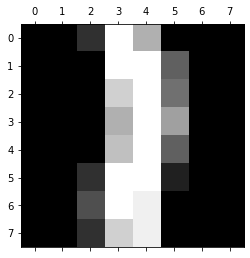

In [67]:
plt.matshow(digits.images[355])    # Gray map of value at 355th position

In [68]:
digits.target[355]    # Actual value at 355th position

1

In [69]:
model.predict([digits.data[355]])   # Predicted value at 355th position

array([1])

In [70]:
y_predicted = model.predict(X_test)   # Predicting values using test set

### Creating Confusion Matrix for visualize how much value we predict correct or False

In [71]:
cm = confusion_matrix(y_test, y_predicted)
cm    # Confusion matrix 

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  0,  2,  0],
       [ 0,  1,  0,  0, 35,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  1],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 36]], dtype=int64)

Text(123.0, 0.5, 'Truth')

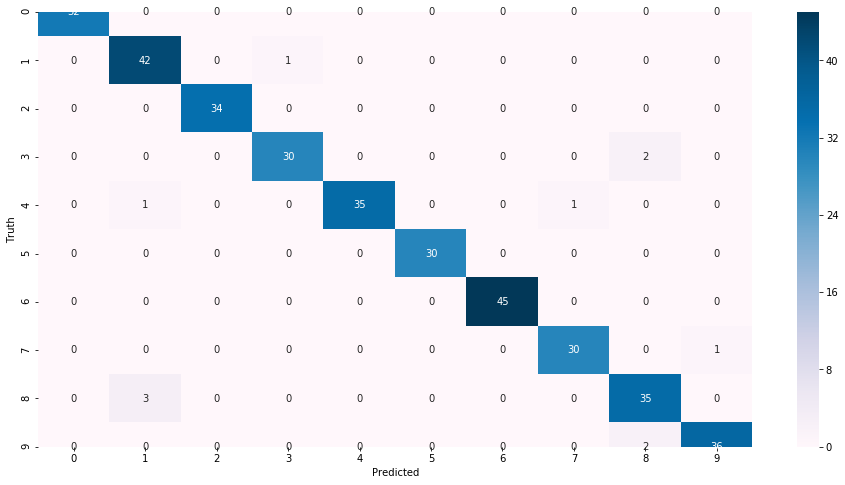

In [72]:
# Heat map of the predicted and actual values of the dataset

plt.figure(figsize=(16,8))
sns.heatmap(cm, annot=True, cmap='PuBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Checking Recall precision or support

In [73]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))  # Checking values 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.91      0.98      0.94        43
           2       1.00      1.00      1.00        34
           3       0.97      0.94      0.95        32
           4       1.00      0.95      0.97        37
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        45
           7       0.97      0.97      0.97        31
           8       0.90      0.92      0.91        38
           9       0.97      0.95      0.96        38

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## Conclusions

1. The accuracy of the model with Logistic Regression is 97%.
2. By seeing the heat map we can see that how many times the model predicts correct values and incorrect values.

***

<center> <h2>Decision Tree Classifier</h2><center>

In [74]:
model1 = tree.DecisionTreeClassifier()  # Training model using Decision tree
model1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [75]:
model1.score(X_test, y_test) # Accuracy of the model

0.8666666666666667

In [76]:
y_predicted1 = model1.predict(X_test)  # Making predictions using test set

In [77]:
cm1 = confusion_matrix(y_test, y_predicted1)
cm1  # Confusion matrix

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  3,  1,  2,  0,  0,  0,  1,  1],
       [ 0,  0, 27,  2,  0,  0,  1,  0,  4,  0],
       [ 0,  0,  1, 28,  0,  1,  1,  1,  0,  0],
       [ 1,  2,  0,  0, 30,  2,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  1, 26,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  2,  0, 43,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  2,  2,  3,  0,  1,  0,  0, 28,  2],
       [ 0,  1,  0,  0,  0,  2,  0,  0,  2, 33]], dtype=int64)

Text(123.0, 0.5, 'Truth')

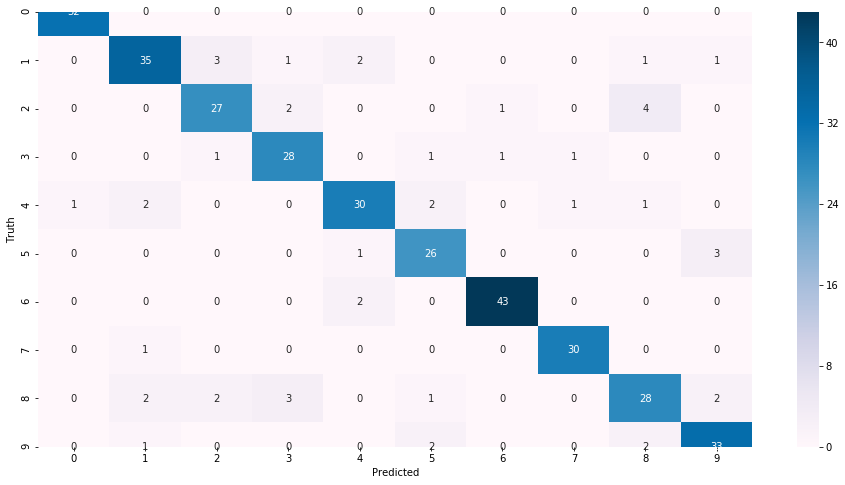

In [78]:
# Heat Map between the actual and predicted values

plt.figure(figsize=(16,8))
sns.heatmap(cm1, annot=True, cmap='PuBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [79]:
predictions1 = model1.predict(X_test)  # Checking values like accuracy and recall values after predictions
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       0.85      0.81      0.83        43
           2       0.82      0.79      0.81        34
           3       0.82      0.88      0.85        32
           4       0.86      0.81      0.83        37
           5       0.81      0.87      0.84        30
           6       0.96      0.96      0.96        45
           7       0.94      0.97      0.95        31
           8       0.78      0.74      0.76        38
           9       0.85      0.87      0.86        38

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.87      0.87      0.87       360



## Conclusions

1. The accuracy of the model with Decision Tree is 86%.
2. By seeing the heat map we can see that how many times the model predicts correct values and incorrect values.

***

<center> <h2>SVM</h2><center>

In [81]:
model2 = SVC(kernel='linear')   # Trainig model using Support Vector machine with regularization(c) = 3
model2.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [82]:
model2.score(X_test, y_test)   # Accuracy of the model

0.9722222222222222

In [83]:
y_predicted2 = model2.predict(X_test)  # Making prediction using testing set

In [84]:
cm2 = confusion_matrix(y_test, y_predicted2)  # Confuision matrix using predicted and actual value
cm2

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 29,  0,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 35,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  1,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 37]], dtype=int64)

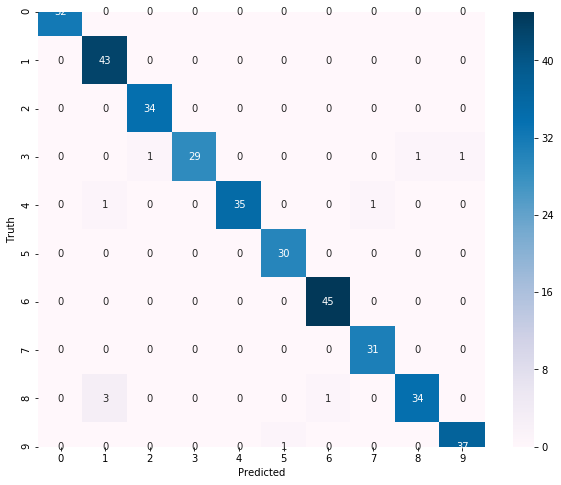

In [87]:
# Heat Map between the actual and predicted values

plt.figure(figsize=(10,8))
sns.heatmap(cm2, annot=True, cmap='PuBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [88]:
predictions2 = model2.predict(X_test)     # Checking values like accuracy and recall values after predictions
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.91      1.00      0.96        43
           2       0.97      1.00      0.99        34
           3       1.00      0.91      0.95        32
           4       1.00      0.95      0.97        37
           5       0.97      1.00      0.98        30
           6       0.98      1.00      0.99        45
           7       0.97      1.00      0.98        31
           8       0.97      0.89      0.93        38
           9       0.97      0.97      0.97        38

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## Conclusions

1. The accuracy of the model with Support Vector Machine is 97%.
2. By seeing the heat map we can see that how many times the model predicts correct values and incorrect values.

***

<center> <h2>Random Forest Classifier</h2><center>

### import RandomForest library

In [89]:
model3 = RandomForestClassifier(80)  # Training model using random forest with n_estimators = 80
model3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
model3.score(X_test, y_test)  # Accuracy of the model

0.9833333333333333

In [91]:
y_predicted3 = model3.predict(X_test)  # Predicting values using the test set

In [92]:
cm3 = confusion_matrix(y_test, y_predicted3)  # Confusion matrix using predicted and actual values 
cm3

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 37]], dtype=int64)

Text(123.0, 0.5, 'Truth')

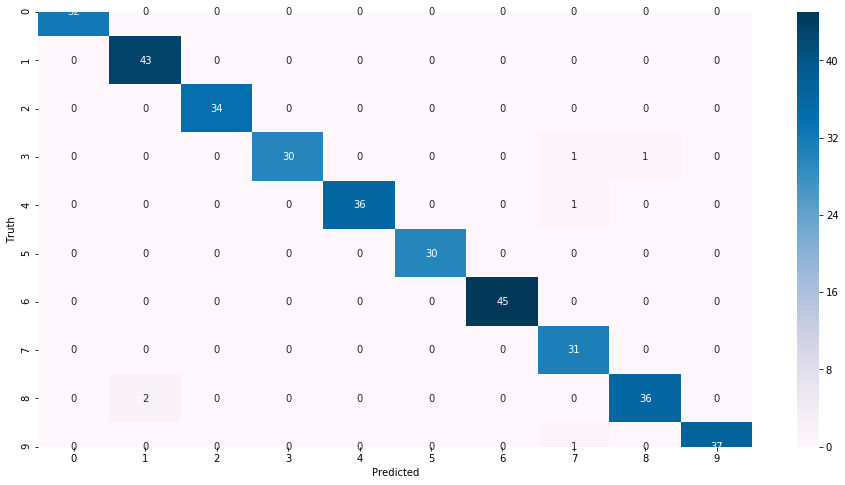

In [93]:
# Heat Map between the actual and predicted values

plt.figure(figsize=(16,8))
sns.heatmap(cm3, annot=True, cmap='PuBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [94]:
predictions3 = model3.predict(X_test)   # Checking values like accuracy and recall values after predictions
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.96      1.00      0.98        43
           2       1.00      1.00      1.00        34
           3       1.00      0.94      0.97        32
           4       1.00      0.97      0.99        37
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        45
           7       0.91      1.00      0.95        31
           8       0.97      0.95      0.96        38
           9       1.00      0.97      0.99        38

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



## Conclusions

1. The accuracy of the model with Random Tree Classifier is 98%.
2. By seeing the heat map we can see that how many times the model predicts correct values and incorrect values.

## Final Result:

By using different Algoritms for traing model we can conclude that:
1. Random forest gives the maximum accuracy of 98%.
2. SVM and Logistics gives accuracy of 97%.
3. Decision tree gives the minimum accuracy of 86% among the other algorithms.

***